In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import pickle

In [2]:
file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties_imputed.csv')

df = pd.read_csv(file_path)

df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
2850,flat,vatika gurgaon,sector 83,0.98,8167.0,2,2,3,5.0,Relatively New,1300.000000,0,0,0,0,0,2,105
1144,house,independent,sector 110,1.00,8795.0,3,2,2,1.0,Old Property,120.000000,0,0,0,1,0,0,0
1920,flat,m3m the marina,sector 68,1.00,12500.0,2,2,3,21.0,Relatively New,888.888889,0,0,0,0,0,0,40
2834,flat,shree vardhman victoria,sector 70,1.23,9111.0,2,2,3,1.0,Relatively New,1221.428571,0,1,0,0,0,0,52
143,flat,"new colony, gurgaon",sector 7,0.80,8097.0,3,2,1,4.0,Relatively New,1100.000000,0,0,0,0,0,2,69


In [3]:
latlong_filepath = os.path.join(os.path.dirname(sys.path[0]), 'final_model_data/latlong.pkl')

latlong_filepath

'/home/himanshu/Projects/ML_Proj/PropertyApp/final_model_data/latlong.pkl'

In [4]:
with open(latlong_filepath, 'rb') as file:
    latlong_df = pickle.load(file)

In [5]:
latlong_df.sample(5)

,sector,coordinates
30,sector 28,"28.4728° N, 77.0865° E"
19,sector 17b,"28.4806° N, 77.0663° E"
25,sector 23,"28.5121° N, 77.0478° E"
17,sector 17,"28.4791° N, 77.0608° E"
38,sector 36,"28.4160° N, 76.9914° E"


In [6]:
latlong_df['latitude'] = latlong_df['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
latlong_df['longitude'] = latlong_df['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

latlong_df.sample(5)

,sector,coordinates,latitude,longitude
81,sector 74,"28.4158° N, 77.0118° E",28.4158,77.0118
101,sector 91,"28.4014° N, 76.9225° E",28.4014,76.9225
123,sector 112,"28.5189° N, 77.0183° E",28.5189,77.0183
113,sector 102,"28.4750° N, 76.9715° E",28.4750,76.9715
75,sector 68,"28.3853° N, 77.0484° E",28.3853,77.0484


In [7]:
new_df = df.merge(latlong_df, on = 'sector')

new_df.sample(5)

new_df.dtypes

property_type       object
society             object
sector              object
price              float64
price_per_sqft     float64
bedroom              int64
bathroom             int64
balcony             object
floorNum           float64
agePossession       object
built_up_area      float64
servant room         int64
study room           int64
store room           int64
pooja room           int64
others               int64
furnishing_type      int64
luxury_score         int64
coordinates         object
latitude           float64
longitude          float64
dtype: object

In [8]:
group_df = new_df[['sector','price','price_per_sqft','built_up_area','latitude','longitude']].groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [9]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
dwarka expressway,1.372500,8988.375000,1605.906746,28.5205,77.0235
gwal pahari,3.192222,9585.777778,3055.597884,28.4484,77.0210
manesar,0.962258,4608.064516,2027.184690,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.698413,28.3663,76.9456
sector 102,1.696636,10603.822430,1555.853768,28.4750,76.9715
...,...,...,...,...,...
sector 99,1.488333,6798.250000,1802.605820,28.4640,76.9614
sector 99a,0.816000,6257.733333,1188.750190,28.4561,76.9542
sector 9a,1.482000,7326.300000,1962.833333,28.4711,76.9981


In [10]:
fig = px.scatter_mapbox(group_df, lat = 'latitude', lon = 'longitude', color = 'price_per_sqft',
                        size = 'built_up_area', color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom = 10, mapbox_style='open-street-map', text = group_df.index)

fig.show()

In [12]:
file_path = os.path.join(os.path.dirname(sys.path[0]), 'final_model_data/map_df.pkl')

with open(file_path, 'wb') as file:
    pickle.dump(new_df, file)

In [13]:
file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties_temp.csv')

df1 = pd.read_csv(file_path)

df1.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
2261,house,satya the hermitage,sector 103,3.15,6702.0,4700.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,not available,12.0,East,undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro St...",NaN,NaN
546,flat,smart world gems,sector 89,1.16,10500.0,1105.0,Super Built up area 1103(102.47 sq.m.),3,2,3,study room,1.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F..."
2373,flat,aipl the peaceful homes,sector 70a,2.50,10638.0,2350.0,Super Built up area 2350(218.32 sq.m.),3,4,3,"servant room,store room",8.0,South,1 to 5 Year Old,"['Airia Mall', 'Golf Corse Ext. Rd.', 'Nationa...","['5 Wardrobe', '4 Fan', '1 Exhaust Fan', '6 Ge...","['Water purifier', 'Centrally Air Conditioned'..."
156,house,independent,sector 11,0.44,4251.0,1035.0,Carpet area: 115 (96.15 sq.m.),3,2,1,"pooja room,others",1.0,NaN,1 to 5 Year Old,NaN,NaN,"['Water Storage', 'Recently Renovated', 'Visit..."
3195,flat,paras dews,sector 106,1.34,9550.0,1403.0,Super Built up area 2355(218.79 sq.m.)Built Up...,4,5,3+,servant room,7.0,South-East,1 to 5 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping ...","['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Security / F..."


In [16]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features', 'sector_y']]

wordcloud_df.sample(5)

,features,sector_y
2314,"['Security / Fire Alarm', 'Intercom Facility',...",sector 88a
624,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 86
677,NaN,sector 70a
1965,"['Centrally Air Conditioned', 'Water purifier'...",sector 37d
531,"['Feng Shui / Vaastu Compliant', 'Security / F...",manesar


In [32]:
temp_df = wordcloud_df.copy()
temp_df['features'].dropna(inplace=True)
temp_df = temp_df.groupby('sector_y').sum().reset_index()

file_path = os.path.join(os.path.dirname(sys.path[0]), 'final_model_data/wordcloud.pkl')

with open(file_path, 'wb') as file:
    pickle.dump(temp_df, file)

In [33]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

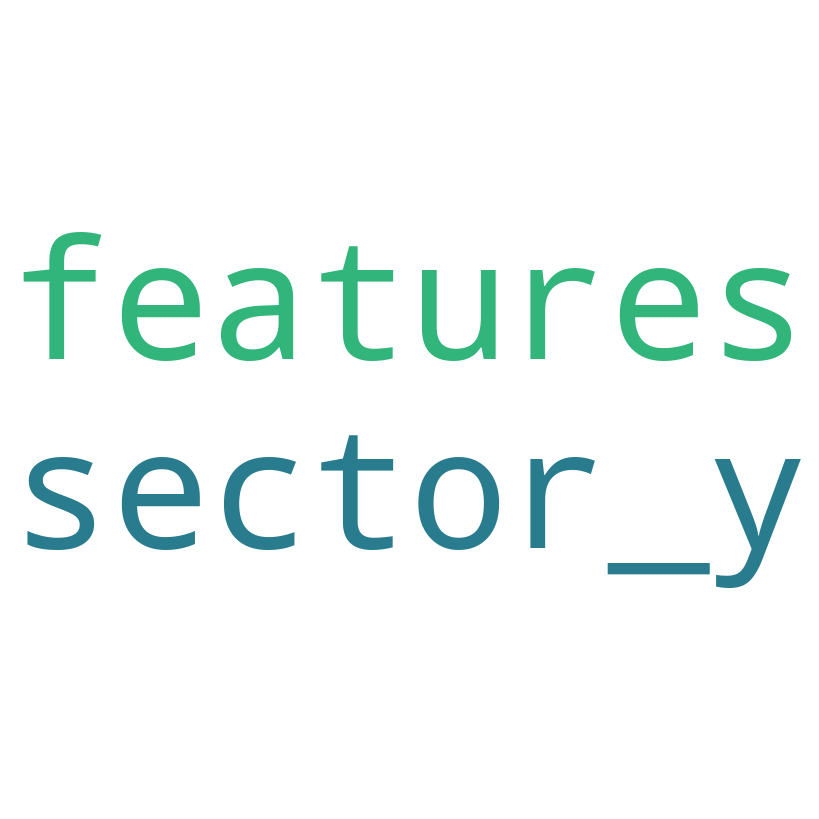

In [34]:
from wordcloud import WordCloud

file_path = os.path.join(os.path.dirname(sys.path[0]), 'final_model_data/wordcloud.pkl')

with open(file_path, 'rb') as file:
    feature_text = pickle.load(file)

feature_text = ' '.join(feature_text)

plt.rcParams['font.family'] = 'Arial'

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(['s']),
                      min_font_size=10).generate(feature_text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [35]:
fig = px.scatter(df, x = 'built_up_area', y='price', color = 'bedroom', title='Area vs Price')

fig.show()

In [36]:
fig = px.pie(new_df, names = 'bedroom', title='Total Bill Amount by Day')

fig.show()